In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import umap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import glob

In [ ]:
files = glob.glob('../../filldata/*')
files

['../../filldata/Data_Scaler_20180510.csv',
 '../../filldata/Data_Scaler_20181127.csv']

In [ ]:
# Data loading and pre-processing:
#merged_data = pd.DataFrame()

for filename in sorted(files, reverse=True):
    if not filename.startswith("Data_Scaler"): continue
    print(filename)
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep=',')
    dataset = dataset.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
    print (dataset.shape)
    dataset.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
    dataset = dataset.set_index('Timestamp')
    dataset.index = pd.DatetimeIndex(dataset.index).round(freq='1s')
    #dataset.index = pd.to_datetime(dataset.index)
    #dataset.columns[1] = pd.datetime.strptime(dataset.columns[1], "%X")
    print(dataset.head())    
    #print(dataset.index)
    print(dataset.index.shape)
    #print(type(dataset)) 

In [5]:
data_dir = '../../filldata/'

In [6]:
# Data loading and pre-processing:
dataset_train = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20180510.csv'), sep=',',infer_datetime_format=True)
dataset_train = dataset_train.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_train.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_train = dataset_train.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_train.index = pd.DatetimeIndex(dataset_train.index).round(freq='1s')#.round(freq='ms')
print(dataset_train.head())
    
dataset_test = pd.read_csv(os.path.join(data_dir, 'Data_Scaler_20181127.csv'), sep=',',infer_datetime_format=True)
dataset_test = dataset_test.drop(columns=['ms','orb','d0','d1','d2','xs','dc01','dc02','dc12','ldc01','ldc02','ldc12'])
dataset_test.columns = [filename[:19],'Timestamp','Ch', 's0', 's1', 's2']
dataset_test = dataset_test.set_index('Timestamp')
#dataset.index = pd.to_datetime(dataset.index)
dataset_test.index = pd.DatetimeIndex(dataset_test.index).round(freq='1s')
print(dataset_test.head())

#dataset_train.plot(figsize = (12,6))

                           ../../filldata/Data  Ch  s0  s1  s2
Timestamp                                                     
2018-05-10 20:54:19+00:00                    0   0   0   0   0
2018-05-10 20:54:19+00:00                    1   1   0   0   0
2018-05-10 20:54:19+00:00                    2   2   0   0   0
2018-05-10 20:54:19+00:00                    3   3   0   0   0
2018-05-10 20:54:19+00:00                    4   4   0   0   0
                           ../../filldata/Data  Ch  s0  s1  s2
Timestamp                                                     
2018-11-27 22:50:15+00:00                    0   0   0  24  26
2018-11-27 22:50:15+00:00                    1   1  57  39  41
2018-11-27 22:50:15+00:00                    2   2  45  36  32
2018-11-27 22:50:15+00:00                    3   3  19  12  22
2018-11-27 22:50:15+00:00                    4   4   8  18   0


In [7]:
# Data loading and pre-processing:
dataset_test = dataset_test.dropna()
dataset_train = dataset_train.dropna()
dataset_train[dataset_train.isna().any(axis=1)] 
dataset_test[dataset_test.isna().any(axis=1)] 
dataset_train = dataset_train.drop(dataset_train.columns[0], axis=1)
dataset_test = dataset_test.drop(dataset_test.columns[0], axis=1)
display(dataset_train)
display(dataset_test)

,Ch,s0,s1,s2
Timestamp,,,,
2018-05-10 20:54:19+00:00,0,0,0,0
2018-05-10 20:54:19+00:00,1,0,0,0
2018-05-10 20:54:19+00:00,2,0,0,0
2018-05-10 20:54:19+00:00,3,0,0,0
2018-05-10 20:54:19+00:00,4,0,0,0
...,...,...,...,...
2018-05-11 10:22:55+00:00,11,585,596,766
2018-05-11 10:22:55+00:00,12,582,634,708
2018-05-11 10:22:55+00:00,13,540,589,665


,Ch,s0,s1,s2
Timestamp,,,,
2018-11-27 22:50:15+00:00,0,0,24,26
2018-11-27 22:50:15+00:00,1,57,39,41
2018-11-27 22:50:15+00:00,2,45,36,32
2018-11-27 22:50:15+00:00,3,19,12,22
2018-11-27 22:50:15+00:00,4,8,18,0
...,...,...,...,...
2018-11-28 07:03:41+00:00,11,0,17,19
2018-11-28 07:03:41+00:00,12,12,18,12
2018-11-28 07:03:41+00:00,13,11,14,13


In [8]:
#Concatenating all channels, training data
result0 = dataset_train.loc[dataset_train['Ch'] == 0]
result0.columns = ['Ch','s0_0', 's1_0', 's2_0']
result1 = dataset_train.loc[dataset_train['Ch'] == 1]
result1.columns = ['Ch','s0_1', 's1_1', 's2_1']
result2 = dataset_train.loc[dataset_train['Ch'] == 2]
result2.columns = ['Ch','s0_2', 's1_2', 's2_2']
result3 = dataset_train.loc[dataset_train['Ch'] == 3]
result3.columns = ['Ch','s0_3', 's1_3', 's2_3']
result4 = dataset_train.loc[dataset_train['Ch'] == 4]
result4.columns = ['Ch','s0_4', 's1_4', 's2_4']
result5 = dataset_train.loc[dataset_train['Ch'] == 5]
result5.columns = ['Ch','s0_5', 's1_5', 's2_5']
result6 = dataset_train.loc[dataset_train['Ch'] == 6]
result6.columns = ['Ch','s0_6', 's1_6', 's2_6']
result7 = dataset_train.loc[dataset_train['Ch'] == 7]
result7.columns = ['Ch','s0_7', 's1_7', 's2_7']
result8 = dataset_train.loc[dataset_train['Ch'] == 8]
result8.columns = ['Ch','s0_8', 's1_8', 's2_8']
result9 = dataset_train.loc[dataset_train['Ch'] == 9]
result9.columns = ['Ch','s0_9', 's1_9', 's2_9']
result10 = dataset_train.loc[dataset_train['Ch'] == 10]
result10.columns = ['Ch','s0_10', 's1_10', 's2_10']
result11 = dataset_train.loc[dataset_train['Ch'] == 11]
result11.columns = ['Ch','s0_11', 's1_11', 's2_11']
result12 = dataset_train.loc[dataset_train['Ch'] == 12]
result12.columns = ['Ch','s0_12', 's1_12', 's2_12']
result13 = dataset_train.loc[dataset_train['Ch'] == 13]
result13.columns = ['Ch','s0_13', 's1_13', 's2_13']
result14 = dataset_train.loc[dataset_train['Ch'] == 14]
result14.columns = ['Ch','s0_14', 's1_14', 's2_14']
result15 = dataset_train.loc[dataset_train['Ch'] == 15]
result15.columns = ['Ch','s0_15', 's1_15', 's2_15']
df = pd.concat([result0, result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12, result13, result14, result15], axis=1)
df=  df.drop(df[['Ch']], axis=1)
display(df)

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-05-10 20:54:19+00:00,0,0,0,0,0,0,0,0,0,0,...,627,574,593,623,469,440,530,435,412,459
2018-05-10 20:54:20+00:00,2,595,715,927,837,897,823,703,794,472,...,633,617,580,632,487,457,588,422,454,469
2018-05-10 20:54:21+00:00,3,627,746,1016,888,900,786,714,794,451,...,600,573,594,600,491,541,564,440,432,473
2018-05-10 20:54:22+00:00,1,646,731,935,882,929,811,735,842,468,...,642,649,638,627,482,473,530,412,467,439
2018-05-10 20:54:22+00:00,1,669,776,1018,868,930,779,749,840,445,...,598,598,603,679,485,502,523,401,470,472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-11 10:22:52+00:00,0,658,768,626,627,694,642,584,700,538,...,773,607,611,632,564,614,675,612,617,615
2018-05-11 10:22:52+00:00,0,633,703,647,664,706,557,556,667,516,...,739,564,622,669,521,535,670,542,618,663
2018-05-11 10:22:53+00:00,2,608,767,565,612,661,593,554,681,482,...,709,580,605,616,562,505,619,494,615,611


In [9]:
#Concatenating all channels, test data
result0 = dataset_test.loc[dataset_test['Ch'] == 0]
result0.columns = ['Ch','s0_0', 's1_0', 's2_0']
result1 = dataset_test.loc[dataset_test['Ch'] == 1]
result1.columns = ['Ch','s0_1', 's1_1', 's2_1']
result2 = dataset_test.loc[dataset_test['Ch'] == 2]
result2.columns = ['Ch','s0_2', 's1_2', 's2_2']
result3 = dataset_test.loc[dataset_test['Ch'] == 3]
result3.columns = ['Ch','s0_3', 's1_3', 's2_3']
result4 = dataset_test.loc[dataset_test['Ch'] == 4]
result4.columns = ['Ch','s0_4', 's1_4', 's2_4']
result5 = dataset_test.loc[dataset_test['Ch'] == 5]
result5.columns = ['Ch','s0_5', 's1_5', 's2_5']
result6 = dataset_test.loc[dataset_test['Ch'] == 6]
result6.columns = ['Ch','s0_6', 's1_6', 's2_6']
result7 = dataset_test.loc[dataset_test['Ch'] == 7]
result7.columns = ['Ch','s0_7', 's1_7', 's2_7']
result8 = dataset_test.loc[dataset_test['Ch'] == 8]
result8.columns = ['Ch','s0_8', 's1_8', 's2_8']
result9 = dataset_test.loc[dataset_test['Ch'] == 9]
result9.columns = ['Ch','s0_9', 's1_9', 's2_9']
result10 = dataset_test.loc[dataset_test['Ch'] == 10]
result10.columns = ['Ch','s0_10', 's1_10', 's2_10']
result11 = dataset_test.loc[dataset_test['Ch'] == 11]
result11.columns = ['Ch','s0_11', 's1_11', 's2_11']
result12 = dataset_test.loc[dataset_test['Ch'] == 12]
result12.columns = ['Ch','s0_12', 's1_12', 's2_12']
result13 = dataset_test.loc[dataset_test['Ch'] == 13]
result13.columns = ['Ch','s0_13', 's1_13', 's2_13']
result14 = dataset_test.loc[dataset_test['Ch'] == 14]
result14.columns = ['Ch','s0_14', 's1_14', 's2_14']
result15 = dataset_test.loc[dataset_test['Ch'] == 15]
result15.columns = ['Ch','s0_15', 's1_15', 's2_15']
df1 = pd.concat([result0, result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12, result13, result14, result15], axis=1)
df1 =  df1.drop(df1[['Ch']], axis=1)
display(df1)

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_12,s0_13,s1_13,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-27 22:50:15+00:00,0,24,26,57,39,41,45,36,32,19,...,21,18,22,27,26,31,32,11,24,24
2018-11-27 22:50:15+00:00,0,23,27,47,41,42,44,42,37,16,...,25,30,23,24,22,23,15,7,26,22
2018-11-27 22:50:16+00:00,2,27,32,59,62,58,46,41,48,29,...,28,27,30,37,26,18,16,33,31,29
2018-11-27 22:50:17+00:00,0,21,28,47,61,47,35,37,42,24,...,34,19,27,23,17,15,22,18,22,28
2018-11-27 22:50:18+00:00,1,31,21,62,49,47,45,40,53,19,...,29,33,32,32,25,38,31,19,26,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28 07:03:38+00:00,0,174,17,11,18,17,14,14,9,17,...,13,10,18,17,24,12,22,18,18,27
2018-11-28 07:03:38+00:00,0,169,17,14,14,25,9,13,12,19,...,17,14,16,20,17,18,13,16,18,22
2018-11-28 07:03:39+00:00,0,167,18,14,25,13,11,19,15,18,...,17,15,24,19,26,7,17,15,28,22


In [10]:
X_train = df
X_test = df1

In [11]:
X_train.reset_index().Timestamp

0       2018-05-10 20:54:19+00:00
1       2018-05-10 20:54:20+00:00
2       2018-05-10 20:54:21+00:00
3       2018-05-10 20:54:22+00:00
4       2018-05-10 20:54:22+00:00
                   ...           
66594   2018-05-11 10:22:52+00:00
66595   2018-05-11 10:22:52+00:00
66596   2018-05-11 10:22:53+00:00
66597   2018-05-11 10:22:54+00:00
66598   2018-05-11 10:22:55+00:00
Name: Timestamp, Length: 66599, dtype: datetime64[ns, UTC]

In [12]:
def one_vs_rest(df:pd.DataFrame, class_column:str):
    """
    One vs Rest classifier
    """
    saved_values = df[class_column].values
    other_cols = df.columns.drop(class_column)
    X_to_reduct = df[other_cols]
    
    reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=1)
    summarized = reducer.fit_transform(X_to_reduct)
    summarized = pd.DataFrame(summarized)
    summarized["Timestamp"] = df.reset_index().Timestamp
    summarized[class_column] = saved_values
    summarized.set_index("Timestamp", inplace = True)
    return summarized

In [13]:
data_train = one_vs_rest(X_train.iloc[:1000], "s0_1")

In [14]:
display(data_train)

,0,s0_1
Timestamp,,
2018-05-10 20:54:19+00:00,9.831816,0
2018-05-10 20:54:20+00:00,8.344344,927
2018-05-10 20:54:21+00:00,7.377667,1016
2018-05-10 20:54:22+00:00,6.384973,935
2018-05-10 20:54:22+00:00,7.056954,1018
...,...,...
2018-05-10 21:06:24+00:00,-5.015975,1116
2018-05-10 21:06:25+00:00,-4.215908,1016
2018-05-10 21:06:26+00:00,-1.521289,1018


In [75]:
#Normalizing training data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_train = scaler.fit_transform(data_train)

<AxesSubplot:>

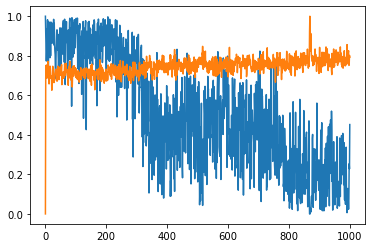

In [17]:
import seaborn as sns
sns.lineplot(x=np.linspace(0,len(scaled_train), len(scaled_train)), y=scaled_train[:, 0])
sns.lineplot(x=np.linspace(0,len(scaled_train), len(scaled_train)), y=scaled_train[:, 1])

In [18]:
data_test = one_vs_rest(X_test.iloc[:1000], "s0_1")

In [76]:
#Normalizing test data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_test = scaler.fit_transform(data_test)

<AxesSubplot:>

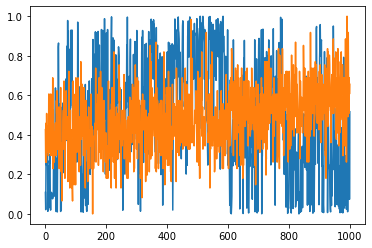

In [23]:
import seaborn as sns
sns.lineplot(x=np.linspace(0,len(scaled_test), len(scaled_test)), y=scaled_test[:, 0])
sns.lineplot(x=np.linspace(0,len(scaled_test), len(scaled_test)), y=scaled_test[:, 1])

In [27]:
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

from sklearn import metrics
import numpy as np
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Input, Dropout 
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json


tensorflow.random.set_seed(10)
model = Sequential()
model.add(Dense(10, input_dim=scaled_train.shape[1], activation='relu', kernel_initializer='glorot_uniform',
                kernel_regularizer=regularizers.l1(0.0)))
model.add(Dense(3, activation='relu',kernel_initializer='glorot_uniform'))
model.add(Dense(10, activation='sigmoid',kernel_initializer='glorot_uniform')) #sigmoid at last level, batch size=100, threshold=0.0017
#model.add(Dense(10, activation='relu',kernel_initializer='glorot_uniform'))  #relu at last level, batch size=50, threshold=0.00078
model.add(Dense(scaled_train.shape[1],kernel_initializer='glorot_uniform')) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                30        
                                                                 
 dense_9 (Dense)             (None, 3)                 33        
                                                                 
 dense_10 (Dense)            (None, 10)                40        
                                                                 
 dense_11 (Dense)            (None, 2)                 22        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Fit the model
history=model.fit(np.array(scaled_train),np.array(scaled_train),epochs=100,
                  validation_split=0.20,
                  batch_size=100,shuffle=True,
                  verbose = 1)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 0.1784 - val_loss: 0.4072
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1437 - val_loss: 0.3504
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.1160 - val_loss: 0.3015
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0942 - val_loss: 0.2602
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0772 - val_loss: 0.2255
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0643 - val_loss: 0.1964
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0546 - val_loss: 0.1721
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0473 - val_loss: 0.1525
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0424 - val_loss: 0.1359
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.0389 - val_loss: 0.1226
Epoch 11/100
8/8 [==========

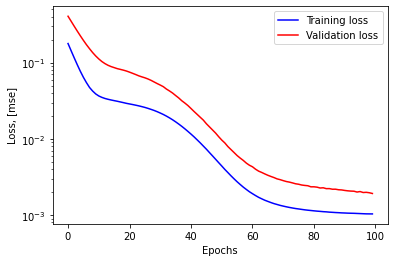

In [29]:
# Visualize training/validation loss:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
plt.yscale('log')
plt.show()

In [30]:
#Compute RMSE
pred = model.predict(scaled_train)
score1 = np.sqrt(metrics.mean_squared_error(pred,scaled_train))

pred = model.predict(scaled_test)
score2 = np.sqrt(metrics.mean_squared_error(pred,scaled_test))


print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Test Samples Good Score (RMSE): {score2}")


Insample Good Score (RMSE): 0.03475721016312079
Test Samples Good Score (RMSE): 0.24725804614310493


In [37]:
X_pred = model.predict(np.array(scaled_train))
X_pred = pd.DataFrame(X_pred)
X_pred.index = X_train.iloc[:1000].index


In [38]:
X_pred


,0,1
Timestamp,,
2018-05-10 20:54:19+00:00,0.927929,0.688984
2018-05-10 20:54:20+00:00,0.904403,0.699890
2018-05-10 20:54:21+00:00,0.845931,0.722631
2018-05-10 20:54:22+00:00,0.822060,0.724579
2018-05-10 20:54:22+00:00,0.820147,0.724802
...,...,...
2018-05-10 21:06:24+00:00,0.118852,0.787298
2018-05-10 21:06:25+00:00,0.155028,0.778028
2018-05-10 21:06:26+00:00,0.266205,0.765052


In [41]:
scaled_train = pd.DataFrame(scaled_train)
scaled_train.index = X_train.iloc[:1000].index

In [42]:
scaled_train

,0,1
Timestamp,,
2018-05-10 20:54:19+00:00,1.000000,0.000000
2018-05-10 20:54:20+00:00,0.902210,0.685651
2018-05-10 20:54:21+00:00,0.838658,0.751479
2018-05-10 20:54:22+00:00,0.773396,0.691568
2018-05-10 20:54:22+00:00,0.817574,0.752959
...,...,...
2018-05-10 21:06:24+00:00,0.023869,0.825444
2018-05-10 21:06:25+00:00,0.076467,0.751479
2018-05-10 21:06:26+00:00,0.253618,0.752959


/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Tue/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


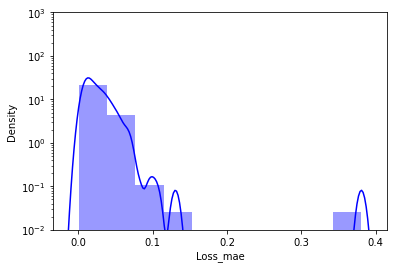

In [44]:
# Distribution of loss function in the training set
import seaborn as sns
X_pred = model.predict(np.array(scaled_train))
X_pred = pd.DataFrame(X_pred, 
                      columns=scaled_train.columns)
X_pred.index = X_train.iloc[:1000].index

scored = pd.DataFrame(index=scaled_train.index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-scaled_train), axis = 1)
plt.figure()
sns.distplot(scored['Loss_mae'],
             bins = 10, 
             kde= True,
            color = 'blue');
#plt.xlim([0.0,.5])
plt.yscale('log')
plt.ylim(1e-2, 1000)
plt.show()


In [48]:
# Setting threshold

X_pred = model.predict(np.array(scaled_test))
X_pred = pd.DataFrame(X_pred)
X_pred.index = X_test.iloc[:1000].index

scored = pd.DataFrame(index=X_test.iloc[:1000].index)
scored['Loss_mae'] = np.mean(np.abs(X_pred-scaled_test), axis = 1)
scored['Threshold'] = 0.19 #sigmoid+batch_size=100
#scored['Threshold'] = 0.00078 #relu+batch_size=50
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2018-11-27 22:50:15+00:00,0.290255,0.19,True
2018-11-27 22:50:15+00:00,0.436115,0.19,True
2018-11-27 22:50:16+00:00,0.246255,0.19,True
2018-11-27 22:50:17+00:00,0.418247,0.19,True
2018-11-27 22:50:18+00:00,0.199216,0.19,True


In [49]:
# all train data

X_pred_train = model.predict(np.array(scaled_train))
X_pred_train = pd.DataFrame(X_pred_train, 
                      columns=scaled_train.columns)
X_pred_train.index = scaled_train.index

scored_train = pd.DataFrame(index=scaled_train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-scaled_train), axis = 1)
scored_train['Threshold'] = 0.19 #sigmoid+batch_size=100 #scored_train['Threshold'] = 0.00078 relu+batch_size=50
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored_all = pd.concat([scored_train, scored])

In [52]:
# all train data

X_pred_train = model.predict(np.array(scaled_train))
X_pred_train = pd.DataFrame(X_pred_train)
X_pred_train.index = X_train.iloc[:1000].index

scored_train = pd.DataFrame(index=X_train.iloc[:1000].index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-scaled_train), axis = 1)
scored_train['Threshold'] = 0.19 #sigmoid+batch_size=100 #scored_train['Threshold'] = 0.00078 relu+batch_size=50
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored_all = pd.concat([scored_train, scored])

In [53]:
scored_train

,Loss_mae,Threshold,Anomaly
Timestamp,,,
2018-05-10 20:54:19+00:00,0.380528,0.19,True
2018-05-10 20:54:20+00:00,0.008216,0.19,False
2018-05-10 20:54:21+00:00,0.018061,0.19,False
2018-05-10 20:54:22+00:00,0.040838,0.19,False
2018-05-10 20:54:22+00:00,0.015365,0.19,False
...,...,...,...
2018-05-10 21:06:24+00:00,0.066565,0.19,False
2018-05-10 21:06:25+00:00,0.052554,0.19,False
2018-05-10 21:06:26+00:00,0.012340,0.19,False


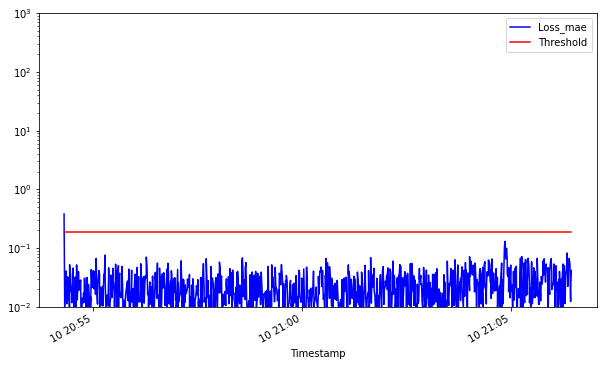

In [54]:
scored_train.plot(logy=True,  figsize = (10,6), ylim = [1e-2,1000], color = ['blue','red'])
plt.show()

/cvmfs/sft-nightlies.cern.ch/lcg/views/dev4/Tue/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:503: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(self.ylim)


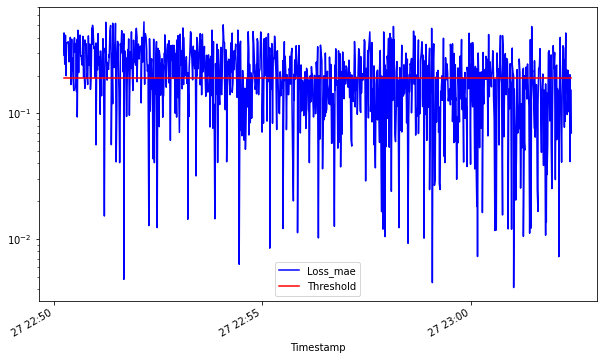

In [55]:
scored.plot(logy=True,  figsize = (10,6), ylim = [0,7e-1], color = ['blue','red'])
plt.show()

In [56]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Input, Dropout
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Model
import seaborn as sns

In [57]:
#As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 

seq_size = 30  # Number of time steps to look back 
#Larger sequences (look further back) may improve forecasting.

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

In [77]:
scaled_train = pd.DataFrame(scaled_train, columns= ["0", "s0_1"])
scaled_test = pd.DataFrame(scaled_test, columns= ["0", "s0_1"])

In [78]:
scaled_train

,0,s0_1
0,1.000000,0.000000
1,0.902210,0.685651
2,0.838658,0.751479
3,0.773396,0.691568
4,0.817574,0.752959
...,...,...
995,0.023869,0.825444
996,0.076467,0.751479
997,0.253618,0.752959
998,0.227806,0.801775


In [79]:
#Define sequences from dataframe
trainX, trainY = to_sequences(scaled_train, scaled_train, seq_size)
testX, testY = to_sequences(scaled_test, scaled_test, seq_size)

In [80]:
np.shape(trainX)

(970, 30, 2)

In [81]:
trainX

array([[[1.        , 0.        ],
        [0.90220988, 0.68565089],
        [0.83865809, 0.75147929],
        ...,
        [0.98443956, 0.71227811],
        [0.85451421, 0.66420118],
        [0.96382756, 0.68713018]],

       [[0.90220988, 0.68565089],
        [0.83865809, 0.75147929],
        [0.77339586, 0.69156805],
        ...,
        [0.85451421, 0.66420118],
        [0.96382756, 0.68713018],
        [0.86467491, 0.6760355 ]],

       [[0.83865809, 0.75147929],
        [0.77339586, 0.69156805],
        [0.8175736 , 0.75295858],
        ...,
        [0.96382756, 0.68713018],
        [0.86467491, 0.6760355 ],
        [0.82719909, 0.70266272]],

       ...,

       [[0.25149735, 0.76923077],
        [0.08787959, 0.84467456],
        [0.31167621, 0.78328402],
        ...,
        [0.06596619, 0.8158284 ],
        [0.02386885, 0.82544379],
        [0.07646733, 0.75147929]],

       [[0.08787959, 0.84467456],
        [0.31167621, 0.78328402],
        [0.15573141, 0.79363905],
        .

In [82]:
input_length = trainX.shape[1]
input_dim = trainX.shape[2]
output_dim = len(trainY[0])

In [83]:
#Define the model
model = Sequential()
model.add(LSTM(128, input_dim = input_dim, input_length = input_length))
 # The max output value is > 1 so relu is used as final activation.
model.add(Dropout(rate=0.2))
model.add(Dense(output_dim))
model.compile(loss='mae',
               optimizer='adam',
               )
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               67072     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 2)                 258       
                                                                 
Total params: 67,330
Trainable params: 67,330
Non-trainable params: 0
_________________________________________________________________


In [84]:
#Fit the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/10
28/28 [==============================] - 3s 40ms/step - loss: 0.1982 - val_loss: 0.0716
Epoch 2/10
28/28 [==============================] - 1s 20ms/step - loss: 0.1010 - val_loss: 0.0851
Epoch 3/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0963 - val_loss: 0.0755
Epoch 4/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0916 - val_loss: 0.0832
Epoch 5/10
28/28 [==============================] - 1s 25ms/step - loss: 0.0904 - val_loss: 0.0704
Epoch 6/10
28/28 [==============================] - 1s 23ms/step - loss: 0.0904 - val_loss: 0.0716
Epoch 7/10
28/28 [==============================] - 1s 22ms/step - loss: 0.0913 - val_loss: 0.0795
Epoch 8/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0886 - val_loss: 0.0739
Epoch 9/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0884 - val_loss: 0.0706
Epoch 10/10
28/28 [==============================] - 1s 21ms/step - loss: 0.0866 - val_loss: 0.0709


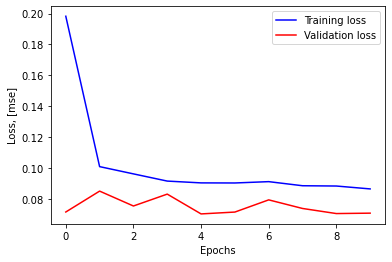

In [96]:
# Visualize training/validation loss:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],
         'b',
         label='Training loss')
plt.plot(history.history['val_loss'],
         'r',
         label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
#plt.ylim([0,.1])
#plt.yscale('log')
plt.show()

In [86]:
Xtrain1 = scaled_train.iloc[0:970,: ]

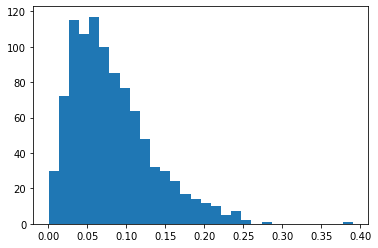

In [88]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - Xtrain1), axis=1)
plt.hist(trainMAE, bins=30)
threshold = 0.25  #or Define 90% value of max as threshold.

In [89]:
Xtest1 = scaled_test.iloc[0:970,: ]

(array([15., 19., 47., 40., 63., 74., 62., 73., 71., 61., 69., 71., 54.,
        48., 40., 33., 24., 19., 22., 16., 12., 13.,  6.,  4.,  3.,  4.,
         0.,  4.,  1.,  2.]),
 array([0.00529168, 0.02193704, 0.0385824 , 0.05522777, 0.07187313,
        0.08851849, 0.10516386, 0.12180922, 0.13845458, 0.15509995,
        0.17174531, 0.18839067, 0.20503603, 0.2216814 , 0.23832676,
        0.25497212, 0.27161749, 0.28826285, 0.30490821, 0.32155358,
        0.33819894, 0.3548443 , 0.37148966, 0.38813503, 0.40478039,
        0.42142575, 0.43807112, 0.45471648, 0.47136184, 0.48800721,
        0.50465257]),
 <BarContainer object of 30 artists>)

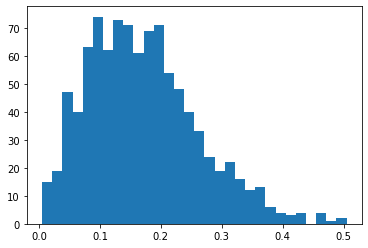

In [90]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - Xtest1), axis=1)
plt.hist(testMAE, bins=30)

In [91]:
#Capture all details in a DataFrame for easy plotting-test
anomaly_df = pd.DataFrame(X_test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['Threshold'] = threshold
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['Threshold']

In [92]:
display(anomaly_df)

,s0_0,s1_0,s2_0,s0_1,s1_1,s2_1,s0_2,s1_2,s2_2,s0_3,...,s2_13,s0_14,s1_14,s2_14,s0_15,s1_15,s2_15,testMAE,Threshold,anomaly
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-27 22:50:39+00:00,1,33,39,56,54,45,30,40,47,22,...,29,22,19,26,17,24,20,NaN,0.25,False
2018-11-27 22:50:40+00:00,0,27,34,56,63,44,44,28,44,16,...,28,24,18,21,15,22,31,NaN,0.25,False
2018-11-27 22:50:40+00:00,0,48,41,57,53,47,39,41,56,25,...,30,24,29,36,18,25,22,NaN,0.25,False
2018-11-27 22:50:41+00:00,0,27,23,59,62,49,56,46,63,17,...,34,24,31,19,23,32,23,NaN,0.25,False
2018-11-27 22:50:42+00:00,3,30,31,56,43,60,48,42,48,31,...,38,27,21,28,25,33,31,NaN,0.25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-28 07:03:38+00:00,0,174,17,11,18,17,14,14,9,17,...,17,24,12,22,18,18,27,NaN,0.25,False
2018-11-28 07:03:38+00:00,0,169,17,14,14,25,9,13,12,19,...,20,17,18,13,16,18,22,NaN,0.25,False
2018-11-28 07:03:39+00:00,0,167,18,14,25,13,11,19,15,18,...,19,26,7,17,15,28,22,NaN,0.25,False


<AxesSubplot:xlabel='Timestamp'>

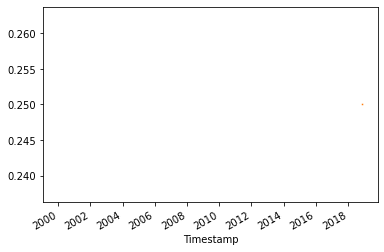

In [93]:
#Plot testMAE vs max_trainMAE
anomaly_df['testMAE'].plot()
anomaly_df['Threshold'].plot()

In [174]:
#Capture all details in a DataFrame for easy plotting-train
anomaly = pd.DataFrame(X_train[seq_size:])
anomaly['trainMAE'] = trainMAE
anomaly['Threshold'] = threshold
anomaly['anomaly'] = anomaly['trainMAE'] > anomaly['Threshold']